# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [245]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [246]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [247]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4927,39,59.30,2209.15,Female,0,No,No,Yes,No,DSL,No,No,No,Yes,No,Yes,One year,No,Electronic check,0
4354,5,69.35,341.6,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
1728,61,93.70,5860.7,Female,0,Yes,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),0
2012,1,20.35,20.35,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2259,68,19.95,1377.7,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0


In [248]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [249]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [250]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [251]:
import seaborn as sns

In [252]:
# конвертируем признак TotalSpent в тип float
train['TotalSpent'] = train['TotalSpent'].replace(' ', None)
train['TotalSpent'] = train['TotalSpent'].astype(float)

test['TotalSpent'] = test['TotalSpent'].replace(' ', None)
test['TotalSpent'] = test['TotalSpent'].astype(float)

In [253]:
# проверим, появились ли пропуски
train[train['TotalSpent'].isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [254]:
# Можно заметить, что TotalSpent = ClientPeriod * MonthlySpending + доп траты
# Пропуски есть там, где ClientPeriod - 0. Тогда заполним пропуски TotalSpent нулями
train['TotalSpent'].fillna(0, inplace=True)
test['TotalSpent'].fillna(0, inplace=True)

In [255]:
# посмотрим описание численных признаков
train[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161
std,24.550326,30.176464,2269.049195
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


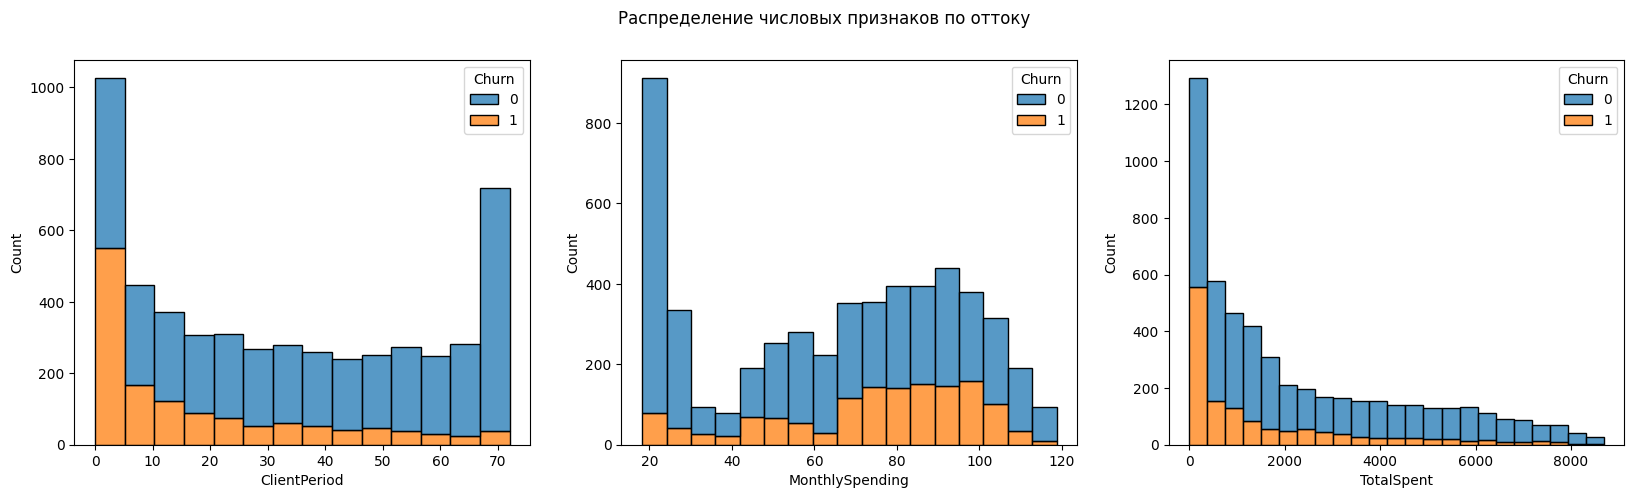

In [256]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=train, x='ClientPeriod', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data=train, x='MonthlySpending', hue='Churn', multiple='stack', ax=axes[1])
sns.histplot(data=train, x='TotalSpent', hue='Churn', multiple='stack', ax=axes[2])

plt.suptitle('Распределение числовых признаков по оттоку');

Видно, что чем дольше клиент пользуется услугами и чем больше суммарно он заплатил за них компании, тем меньше вероятность, что он уйдет. 

In [257]:
# Перейдем к категориальным признакам. Метод .info() показал, что пропусков нигде нет. Рассмотрим каждый подробно
for col in cat_cols:
    print(train[col].value_counts())
    print(test[col].value_counts(), '\n')

Sex
Male      2655
Female    2627
Name: count, dtype: int64
Sex
Male      900
Female    861
Name: count, dtype: int64 

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64
IsSeniorCitizen
0    1461
1     300
Name: count, dtype: int64 

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64
HasPartner
No     936
Yes    825
Name: count, dtype: int64 

HasChild
No     3676
Yes    1606
Name: count, dtype: int64
HasChild
No     1257
Yes     504
Name: count, dtype: int64 

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64
HasPhoneService
Yes    1600
No      161
Name: count, dtype: int64 

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64
HasMultiplePhoneNumbers
No                  879
Yes                 721
No phone service    161
Name: count, dtype: int64 

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64
HasInternetService
Fiber

Пропусков действительно нигде нет. Обратим внимание, что признаки, обозначающие дополнительные слуги, имеют следующие значения - No, Yes, No *название_сервиса* service. Логично будет заменить значения "No *название_сервиса* service" на "No", тем более у нас есть отдельные признаки Has*название_сервиса*Service, которые дублируют эту информацию. Кроме того, так мы сделаем признаки бинарными, и не нужно будет их декодировать. Тогда везде заменим "Yes" на 1, а "No" и "No *название сервиса* service" на 0

In [258]:
cols_to_decode = ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless',
                  'HasMultiplePhoneNumbers', 'HasOnlineSecurityService',
                  'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription']

for col in cols_to_decode:
    train[col] = train[col].apply(lambda x: 1 if x == 'Yes' else 0)
    test[col] = test[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [259]:
# Посмотрим количество категориальных признаков
len(cat_cols)

16

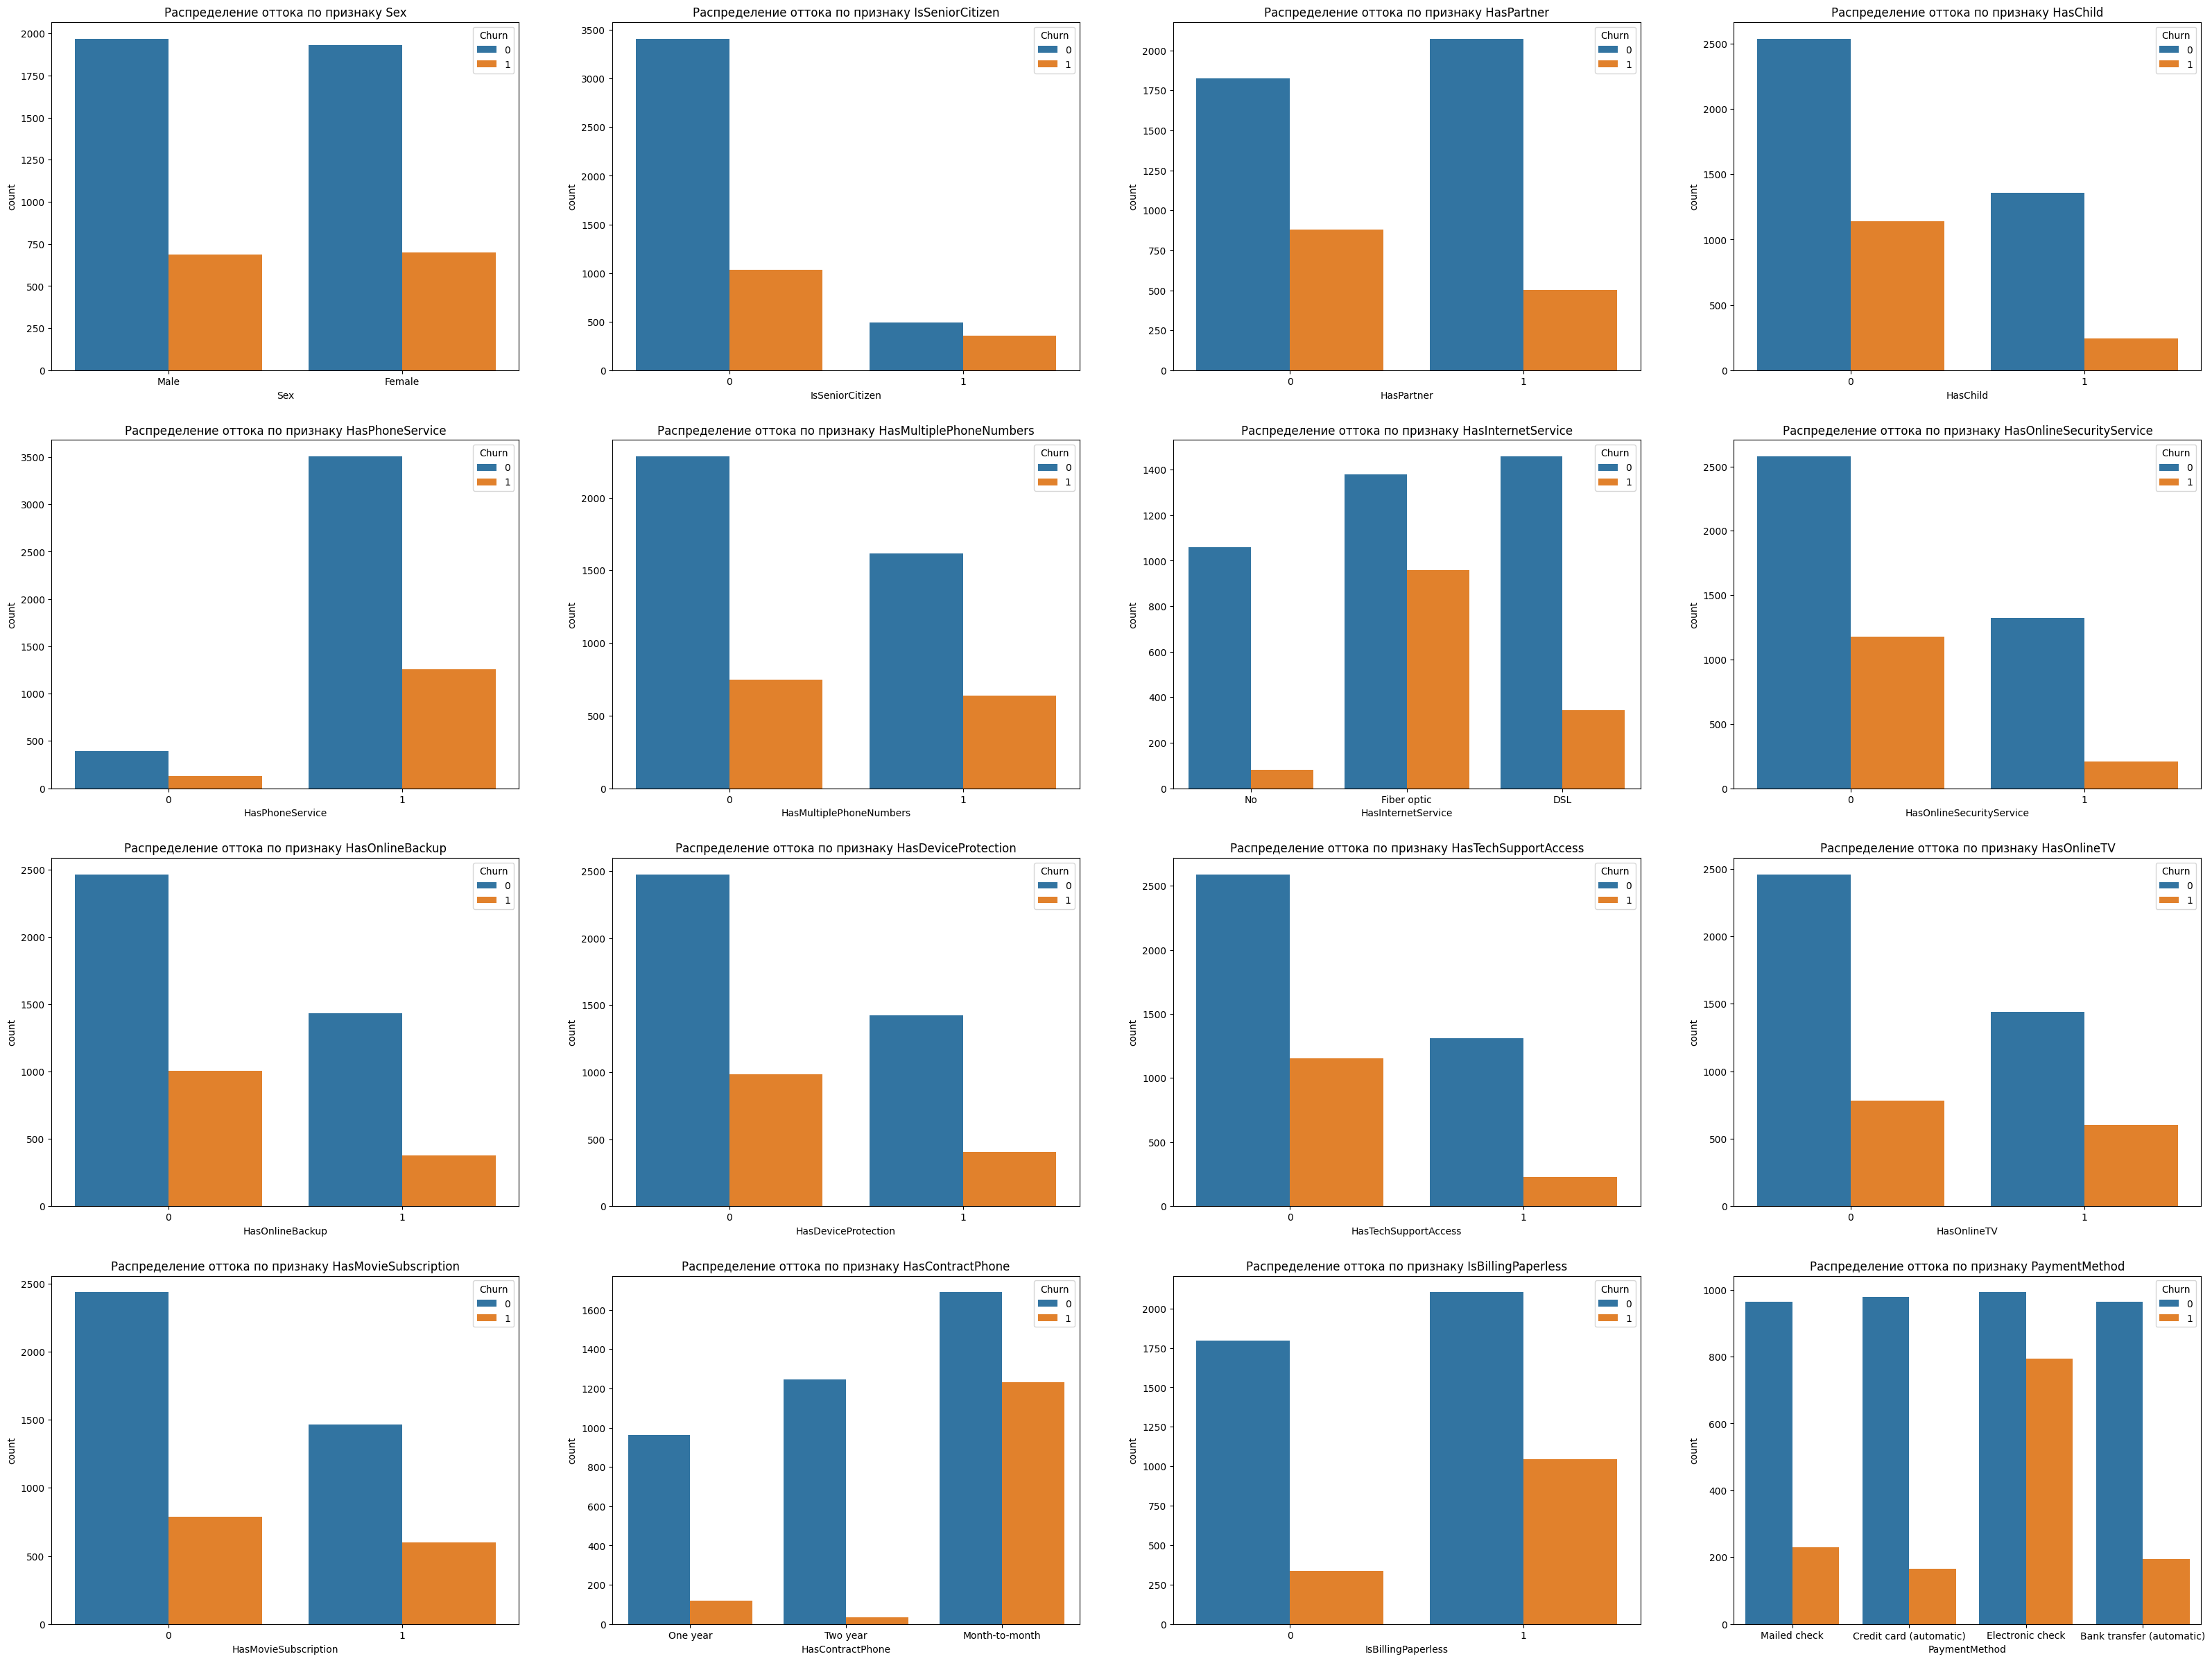

In [260]:
# Построим графики
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(40, 30))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=train, x=col, hue='Churn', ax=ax)
    ax.set_title(f'Распределение оттока по признаку {col}')

plt.show()

Из графиков можно сделать следующие выводы:
- Пол никак не влияет на целевую переменную, можем удалить этот признак;
- Пожилые люди чаще прекращают пользоваться услугами;
- Человек, у которого есть партнер и/или ребенок с меньшей вероятностью перестанет быть клиентом;
- Клиент с несколькими номерами телефона с большей вероятностью может уйти;
- Те, кто не пользуется услугами интернета, реже покидают компанию;
- Клиент, который пользуется опто-волоконным интернетом, с большей вероятностью перестанет пользоваться услугами, чем тот, который использует DSL;
- Пользователь, у которого есть доп услуги, как правило, реже перестает быть клиентом;
- Способ оплаты сильно влияет на целевую переменную.


In [261]:
train.drop(columns='Sex', inplace=True)
test.drop(columns='Sex', inplace=True)

In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   IsSeniorCitizen           5282 non-null   int64  
 4   HasPartner                5282 non-null   int64  
 5   HasChild                  5282 non-null   int64  
 6   HasPhoneService           5282 non-null   int64  
 7   HasMultiplePhoneNumbers   5282 non-null   int64  
 8   HasInternetService        5282 non-null   object 
 9   HasOnlineSecurityService  5282 non-null   int64  
 10  HasOnlineBackup           5282 non-null   int64  
 11  HasDeviceProtection       5282 non-null   int64  
 12  HasTechSupportAccess      5282 non-null   int64  
 13  HasOnlineTV               5282 non-null   int64  
 14  HasMovie

Осталось декодировать 3 признака - HasInternetService, HasContractPhone, PaymentMethod. Сделаем это с помощью One-hot Encoding

In [263]:
train = pd.get_dummies(train, columns=['HasInternetService', 'HasContractPhone', 'PaymentMethod'], drop_first=True)
test = pd.get_dummies(test, columns=['HasInternetService', 'HasContractPhone', 'PaymentMethod'], drop_first=True)

train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasOnlineSecurityService,HasOnlineBackup,...,HasMovieSubscription,IsBillingPaperless,Churn,HasInternetService_Fiber optic,HasInternetService_No,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
221,72,109.15,7789.60,0,1,0,1,1,0,1,...,1,0,0,True,False,True,False,True,False,False
4043,8,66.65,520.95,0,0,0,1,0,0,1,...,0,1,0,False,False,False,False,False,True,False
3943,2,79.75,159.40,1,0,0,1,0,0,0,...,1,1,1,True,False,False,False,False,False,False
2991,1,20.90,20.90,0,0,0,1,0,0,0,...,0,0,1,False,True,False,False,False,False,True
818,69,60.80,4263.40,0,1,0,0,0,0,1,...,1,1,0,False,False,True,False,True,False,False


<Axes: >

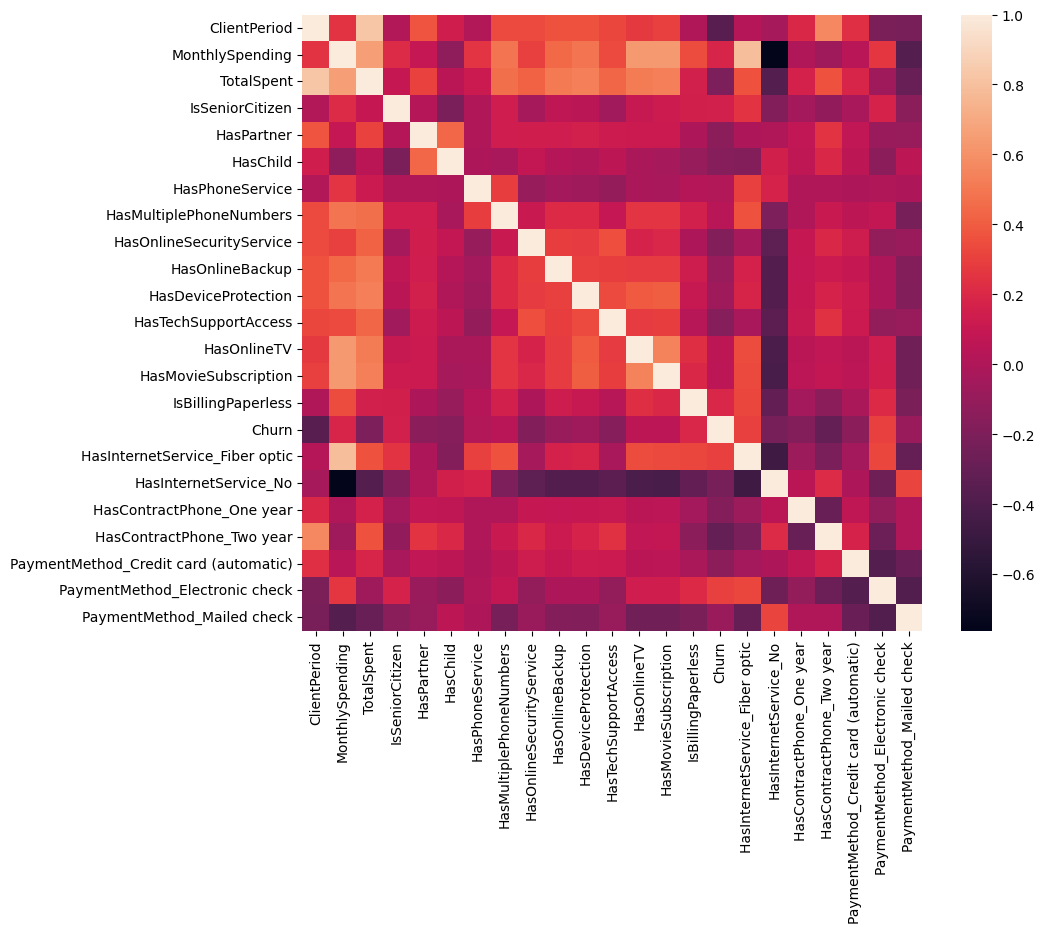

In [264]:
# построим матрицу корреляций
corr_matrix = train.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix)

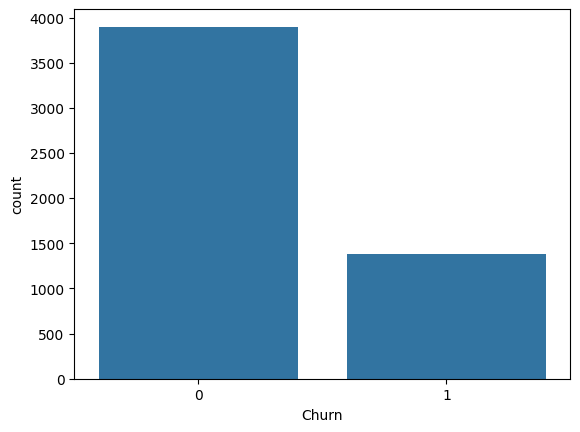

In [265]:
# Посмотрим на распределение целевой переменной
sns.countplot(data=train, x=train['Churn']);

Класс несбалансированы, поэтому как метрику мы используем ROC-AUC.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [266]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [267]:
# нормируем числовые признаки
scaler = StandardScaler()

train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [268]:
# разделим выборку
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(
    columns='Churn'), train['Churn'], test_size=0.2, random_state=42)

In [269]:
# обучим линейную модель
model = LogisticRegressionCV(cv=5, Cs=[100, 10, 1, 0.1, 0.01, 0.001], scoring='roc_auc', refit=True)

model.fit(X_train, y_train)

y_train_pred = model.predict_proba(X_valid)[:, 1]

score = roc_auc_score(y_valid, y_train_pred)
print(f'ROC-AUC: {score:.4f}')
print(f'Best C: {model.C_[0]}')

ROC-AUC: 0.8278
Best C: 10.0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

ROC-AUC: 0.8278

Best C: 10.0

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [270]:
# обучим градиентный бустинг. Категориальные признаки я декодировал заранее вручную,
# поэтому не передаю их, как параметр
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(eval_metric='AUC', verbose=False, random_state=42)

catboost.fit(X_train, y_train, eval_set=(X_valid, y_valid))

y_train_pred = catboost.predict_proba(X_valid)[:, 1]

score = roc_auc_score(y_valid, y_train_pred)
print(f'ROC-AUC: {score:.4f}')

ROC-AUC: 0.8297


In [271]:
# подберем гиперпараметры
params = {'depth': np.arange(2, 8),
          'l2_leaf_reg': np.arange(0.1, 2, 0.5),
          'learning_rate': np.arange(0.01, 0.5, 0.01),
          'n_estimators': np.arange(300, 1000, 200),
          'min_data_in_leaf': np.arange(100, 1001, 100),
          }

grid_search = RandomizedSearchCV(catboost,
                           param_distributions=params,
                           scoring='roc_auc',
                           cv=5,
                           random_state=42,
                           refit=True,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(f'ROC-AUC: {grid_search.best_score_:.4f}')
print(f"Best params: {grid_search.best_params_}")

ROC-AUC: 0.8421
Best params: {'n_estimators': 500, 'min_data_in_leaf': 700, 'learning_rate': 0.09999999999999999, 'l2_leaf_reg': 1.6, 'depth': 2}


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ROC-AUC: 0.8421

Best params: {'n_estimators': 500, 'min_data_in_leaf': 700, 'learning_rate': 0.09999999999999999, 'l2_leaf_reg': 1.6, 'depth': 2}


In [282]:
# теперь обучим catboost на полной выборке с лучшими гиперпараметрами
X_train = train.drop(columns='Churn')
y_train = train['Churn']

best_catboost = CatBoostClassifier(eval_metric='AUC', verbose=False, n_estimators=500,
                                   min_data_in_leaf=700, learning_rate=0.09999999999999999, l2_leaf_reg=1.6, depth=2)

best_catboost.fit(X_train, y_train, eval_set=(X_valid, y_valid))

# Предсказания

In [283]:
best_model = best_catboost

In [284]:
submission = pd.read_csv('./submission.csv', index_col=0)

submission['Churn'] = best_model.predict_proba(test)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.